# Analisando os dados da COVID-19

A COVID-19 é uma doença causada pelo coronavírus. De acordo com a Organização Mundial da Saúde (OMS), cerca de 80% dos pacientes com COVID-19 podem ser assintomáticos e cerca de 20% dos casos podem requerer atendimento hospitalar por apresentarem dificuldade respiratória ([link](https://coronavirus.saude.gov.br/sobre-a-doenca#o-que-e-covid)).
Os sintomas da COVID-19 podem variar de um simples resfriado até uma pneumonia severa. Sendo os sintomas mais comuns: tosse, febre, coriza, dor de garganta e dificuldade para respirar. A transmissão acontece de uma pessoa doente para outra.
<center>
    <img alt="Médico com cartão do COVID-19" width="50%" src="img/medcovid.jpg" />
</center>

Realizaremos uma análise utilizando dados que foram gerados pelo portal [Our World in Data](https://ourworldindata.org/coronavirus) e que podem ser obtidos através da página de Github: ([link](https://github.com/owid/covid-19-data/tree/master/public/data)). Os dados são referentes aos registros de casos e de óbitos em decorrência da COVID-19.

### Dicionário de Variáveis

Antes de começarmos a nossa análise, vamos visualizar o dicionário das variáveis que contém uma pequena descrição do que cada uma das colunas significa: ([link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md)). 

### Importando os dados do COVID-19

Começaremos, então, importando a biblioteca Pandas e lendo o nosso arquivo.

In [1]:
# importando as bibliotecas necessárias e lendo o arquivo

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

df = pd.read_csv('datasets/owid-covid-data.csv') # versão do dia (25 / 06 / 2020)

## Análise Exploratória dos Dados

Vamos começar visualizando as 5 primeiras entradas do conjunto de dados.

In [2]:
# visualizando as 5 primeiras entradas

df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


Agora, obteremos o número de linhas e colunas.

In [3]:
# obtendo o número de linhas e colunas

df.shape

(26119, 34)

Vimos que o conjunto de dados possui 26.119 linhas e 34 colunas. Visualizaremos os tipos de dados de cada coluna.

In [4]:
# visualizando os tipos de dados de cada coluna

df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Observando a porcentagem de valores ausentes em cada coluna podemos ver que possuímos várias colunas com valores faltantes. Nesta análise iremos somente trabalhar com as colunas 'total_deaths', 'total_cases' e 'date'.

In [5]:
# obtendo a quantidade (porcentagem) de valores ausentes em cada coluna

(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)  * 100

new_tests                          73.884911
new_tests_per_thousand             73.884911
total_tests_per_thousand           71.312072
total_tests                        71.312072
new_tests_smoothed_per_thousand    68.995750
new_tests_smoothed                 68.995750
tests_units                        66.621999
handwashing_facilities             59.316972
extreme_poverty                    40.269536
male_smokers                       28.232321
female_smokers                     27.397680
stringency_index                   19.334584
hospital_beds_per_thousand         17.213523
aged_65_older                      10.888625
gdp_per_capita                     10.628278
aged_70_older                      10.076955
median_age                          9.613691
cvd_death_rate                      9.498832
diabetes_prevalence                 6.577587
population_density                  4.334010
life_expectancy                     1.385964
new_deaths_per_million              1.068188
total_deat

Como vimos anteriormente, a coluna 'date' está com o tipo de dado 'object'. Converteremos a coluna 'date' de 'object' para o formato 'datetime'.

In [6]:
# convertendo a coluna 'date' para o formato 'datetime'

df.date = pd.to_datetime(df.date)

### Analisando o total de casos e mortes registradas

E se quisermos saber os 12 países com mais casos registrados até o dia de hoje (25 / 06 / 2020)? Visualizaremos os 12 países com mais casos registrados.

In [7]:
# visualizando os 12 países com mais casos registrados

df.loc[df.date == '2020-06-25', ['iso_code', 'continent', 'location', 'total_cases', 'new_cases']] \
    .sort_values(by = 'total_cases', ascending = False)[1:13].set_index('iso_code')

,continent,location,total_cases,new_cases
iso_code,,,,
USA,North America,United States,2381361.0,34339.0
BRA,South America,Brazil,1188631.0,42725.0
RUS,Europe,Russia,606881.0,7176.0
IND,Asia,India,473105.0,16922.0
GBR,Europe,United Kingdom,306862.0,652.0
PER,South America,Peru,264689.0,3879.0
CHL,South America,Chile,254416.0,3649.0
ITA,Europe,Italy,239410.0,577.0
IRN,Asia,Iran,212501.0,2531.0


E os 12 países com mais MORTES registradas até o dia de hoje?

In [8]:
# visualizando os 12 países com mais mortes registradas

df.loc[df.date == '2020-06-25', ['iso_code', 'continent', 'location', 'total_deaths', 'new_deaths']] \
    .sort_values(by = 'total_deaths', ascending = False)[1:13].set_index('iso_code')

,continent,location,total_deaths,new_deaths
iso_code,,,,
USA,North America,United States,121979.0,751.0
BRA,South America,Brazil,53830.0,1185.0
GBR,Europe,United Kingdom,43081.0,154.0
ITA,Europe,Italy,34644.0,-31.0
FRA,Europe,France,29731.0,11.0
MEX,North America,Mexico,24342.0,965.0
IND,Asia,India,14894.0,418.0
IRN,Asia,Iran,9996.0,133.0
BEL,Europe,Belgium,9722.0,9.0


Para visualizarmos graficamente os dados, iremos plotar um gráfico de barras para os 5 países com mais casos registrados.

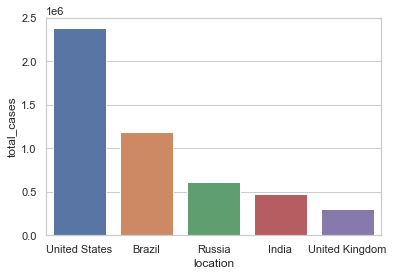

In [9]:
# plotando um gráfico de barras com os 5 países com mais casos registrados

top5_cases = df.loc[df.date == '2020-06-25', ['location', 'total_cases']] \
    .sort_values(by = 'total_cases', ascending = False)[1:6]

sns.barplot(x = 'location', y = 'total_cases', data = top5_cases);

Faremos o mesmo para os 5 países com mais mortes registradas.

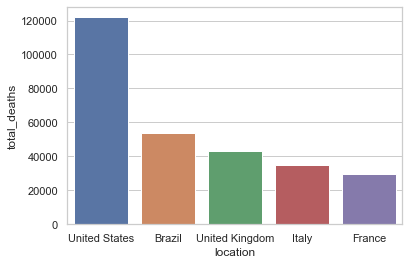

In [10]:
# plotando um gráfico de barras com os 5 países com mais mortes registradas

top5_deaths = df.loc[df.date == '2020-06-25', ['location', 'total_deaths']] \
    .sort_values(by = 'total_deaths', ascending = False)[1:6]

sns.barplot(x = 'location', y = 'total_deaths', data = top5_deaths);

Visualizando os dados e os gráficos notamos que os 5 locais com mais mortes até o momento são: Estados Unidos, Brasil, Reino Unido, Itália e França. Notamos também que a Rússia possui mais de 600 mil casos e menos de 9 mil mortes. Vamos plotar um gráfico de linha com a evolução de mortes por COVID-19 no Mundo.

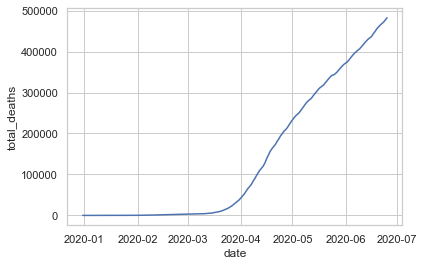

In [11]:
# plotando um gráfico de linha com a evolução de mortes no mundo

world_evolution = df.loc[df.location == 'World'].reset_index(drop = True)
sns.lineplot(x = 'date', y = 'total_deaths', data = world_evolution);

Iremos também plotar um gráfico de linha com a evolução de mortes por COVID-19 nos Estados Unidos e embaixo no México.

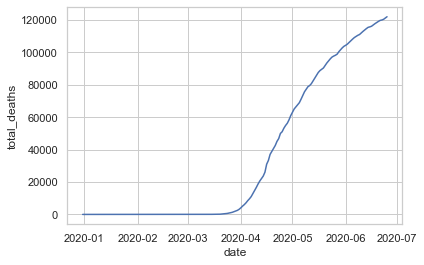

In [12]:
# plotando um gráfico de linha com a evolução de mortes nos Estados Unidos

usa_evolution = df.loc[df.location == 'United States'].reset_index(drop = True)
sns.lineplot(x = 'date', y = 'total_deaths', data = usa_evolution);

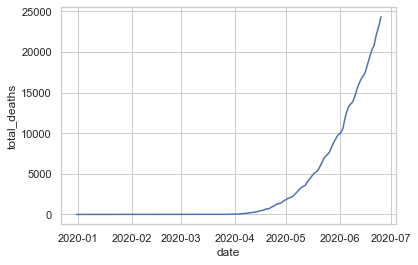

In [13]:
# plotando um gráfico de linha com a evolução de mortes no México

mx_evolution = df.loc[df.location == 'Mexico'].reset_index(drop = True)
sns.lineplot(x = 'date', y = 'total_deaths', data = mx_evolution);

Quanto aos gráficos de linha referentes às mortes no mundo inteiro e nos Estados Unidos, podemos ver que a partir do mês de Abril (4) tivemos uma alta constante de mortes por COVID-19 registradas. Podemos perceber que no México o número de mortes começou a subir no mês de Maio (5) e está num crescimento preocupante.

### Análise Exploratória para o Brasil


Começaremos criando uma cópia dos dados originais mas somente com as informações referentes ao Brasil.

In [14]:
# criando um cópia do dataframe somente com os dados no Brasil

df_brasil = df.loc[df.location == 'Brazil'].copy()

Identificaremos quantos dias levaram para registrar a primeira morte, considerando o primeiro caso de COVID-19 registrado.

In [15]:
# identificando qual foi o dia do primeiro caso e da primeira morte

df_brasil_first_case = df_brasil.loc[(df_brasil.total_cases > 0) & (df_brasil.total_deaths == 0), ['total_cases', 'total_deaths', 'date']][:1]

df_brasil_first_death = df_brasil.loc[df_brasil.total_deaths > 0, ['total_cases', 'total_deaths', 'date']][:1]

df_brasil_first = pd.concat([df_brasil_first_case, df_brasil_first_death])

df_brasil_first

,total_cases,total_deaths,date
3424,1.0,0.0,2020-02-26
3445,291.0,1.0,2020-03-18


Agora sabemos que se passaram 21 dias entre o primeiro caso e a primeira morte no Brasil.

In [16]:
# obtendo a quantidade de dias que se passaram entre o primeiro caso e a primeira morte

days_cases_deaths = df_brasil.date.loc[3445] - df_brasil.date.loc[3424]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(days_cases_deaths.days))

Se passaram 21 dias entre o primeiro caso e a primeira morte no Brasil.


Como vimos, o primeiro caso de COVID-19 registrado no Brasil foi dia 26/02/2020 e a primeira morte foi registrada dia 18/03/2020. Vamos visualizar os 5 primeiros dias que registram mais de 1 morte no Brasil.

In [17]:
# visualizando os 5 primeiros dias que registram mais de 1 morte

df_brasil.loc[df_brasil.total_deaths > 0].sort_values(by = 'date')[:5]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3445,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3446,BRA,South America,Brazil,2020-03-19,428.0,137.0,4.0,3.0,2.014,0.645,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3447,BRA,South America,Brazil,2020-03-20,621.0,193.0,6.0,2.0,2.922,0.908,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3448,BRA,South America,Brazil,2020-03-21,904.0,283.0,11.0,5.0,4.253,1.331,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3449,BRA,South America,Brazil,2020-03-22,1128.0,224.0,18.0,7.0,5.307,1.054,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


Vamos plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais por COVID-19 no Brasil.

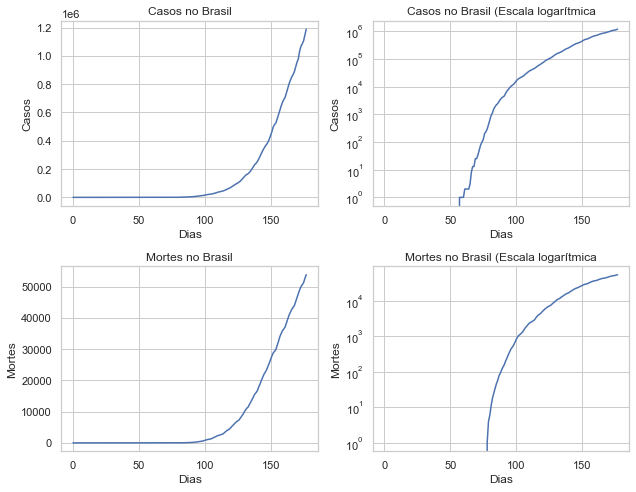

In [18]:
# plotando gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

x = list(range(178))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols=2, figsize=(9, 7))

ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)

plt.tight_layout()

## Conclusão
Na análise realizada no dia 25 de Junho de 2020 sobre os dados do portal Our World in Data, concluímos que:
* Curiosamente a Rússia tem mais de 600 mil casos e menos de 9 mil mortes;
* A Índia tem mais de 470 mil casos e um pouco mais de 14 mil mortes;
* Os Estados Unidos e o Brasil são os países que têm mais casos e mortes;
* O Brasil segue com um número alto de mortes diárias;
* O México está com um aumento preocupante no número de mortes.

In [2]:
# O CÓDIGO ABAIXO É REFERENTE A GERAÇÃO DOS VÍDEOS QUE MOSTRAM A EVOLUÇÃO DE CASOS E DE MORTES POR COVID-19

In [20]:
# pip install bar_chart_race

In [21]:
# import bar_chart_race as bcr

In [22]:
# df.dropna(subset=['location'], inplace = True)

In [23]:
# df_deaths_race = df.loc[(df.total_deaths > 0) & (df.location != 'International')]

In [24]:
# df_cases_race = df.loc[(df.total_cases > 0) & (df.location != 'International')]

In [25]:
# df_deaths_race = pd.DataFrame(df_deaths_race.groupby(['location', 'date']).sum()['total_deaths']).unstack().T.droplevel(level=0)

In [26]:
# df_cases_race = pd.DataFrame(df_cases_race.groupby(['location', 'date']).sum()['total_cases']).unstack().T.droplevel(level=0)

In [27]:
# bcr.bar_chart_race(df_deaths_race, n_bars=8)

In [28]:
# bcr.bar_chart_race(df_cases_race, n_bars=8)